In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

In [2]:
# Load raw verified data
df_verifiedData = pd.read_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/data_collection/Data Verification.csv')
df = df_verifiedData[['Filename', 'Pose 1',
                      'Pose 2','Face Obstructed',
                      'Hands on Face', 'Notes',
                      'poor_quality', 'face_angled']]

# Split files with two people in them into two rows
double_df = df[~df['Pose 2'].isnull()]
df_left = double_df[['Filename', 'Pose 1', 'Hands on Face', 'Face Obstructed', 'Notes']].copy()
df_right = double_df[['Filename', 'Pose 2', 'Hands on Face', 'Face Obstructed', 'Notes']].copy()
dupe_filenames = df_left['Filename'].tolist()

# Create the left person's row
df_left['split_filename'] = df_left['Filename'].apply(lambda x: x.split('_'))
df_left['l_filename'] = df_left['split_filename'].apply(lambda x: "_".join([x[0], x[1], x[2]+"-L", x[3]]))
df_left = df_left.drop(['split_filename', 'Filename'], axis=1)
df_left.rename(columns={'l_filename': 'Filename', 'Pose 1':'Pose'}, inplace=True)
df_left.head()

# Create the right person's row
df_right['split_filename'] = df_right['Filename'].apply(lambda x: x.split('_'))
df_right['r_filename'] = df_right['split_filename'].apply(lambda x: "_".join([x[0], x[1], x[2]+"-R", x[3]]))
df_right = df_right.drop(['split_filename', 'Filename'], axis=1)
df_right.rename(columns={'r_filename': 'Filename', 'Pose 2':'Pose'}, inplace=True)
df_right.head()

# Drop double creator rows
print("Before dropping double rows: ", df.shape)
df2 = df[~df['Filename'].isin(dupe_filenames)]
print("After dropping 571 double rows: ", df2.shape)
df2.rename(columns={'Pose 1':'Pose'}, inplace=True)
df2.drop(['Pose 2'], axis=1, inplace=True)

# Append rows for left and right creators
df2 = df2.append(df_left, ignore_index=True)
df2 = df2.append(df_right, ignore_index=True)
print("After appending 571x2 rows: ", df2.shape)

# Fill in missing values
df2['Face Obstructed'].fillna(0, inplace=True)
df2['Face Obstructed'] = df2['Face Obstructed'].astype(int)
df2['Hands on Face'].fillna(0, inplace=True)
df2['Hands on Face'] = df2['Hands on Face'].astype(int)
df2['poor_quality'].fillna(0, inplace=True)
df2['poor_quality'] = df2['poor_quality'].astype(int)
df2['face_angled'].fillna(0, inplace=True)
df2['face_angled'] = df2['face_angled'].astype(int)
df2['Pose'] = df2['Pose'].astype(int)

# Make creator column from filename
creator_df = pd.read_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/model_data/creator_data.csv')
df3 = df2.copy()
df3['Creator'] = df3['Filename'].apply(lambda x: x.split('_')[2])
# Join creator_df to df3
df3 = df3.merge(creator_df, on='Creator', how='left')
df3.head()

Before dropping double rows:  (7152, 8)
After dropping 571 double rows:  (6581, 8)
After appending 571x2 rows:  (7723, 7)


,Filename,Pose,Face Obstructed,Hands on Face,Notes,poor_quality,face_angled,Creator,Gender,Apparent_Race
0,Pose_9_Yoga-with-Souvik_317.jpg,0,0,0,NaN,0,0,Yoga-with-Souvik,M,Indian
1,Pose_9_Yoga-with-Souvik_316.jpg,0,0,0,NaN,0,0,Yoga-with-Souvik,M,Indian
2,Pose_9_Yoga-with-Souvik_315.jpg,9,0,0,NaN,0,0,Yoga-with-Souvik,M,Indian
3,Pose_9_Yoga-with-Souvik_314.jpg,0,0,0,NaN,0,0,Yoga-with-Souvik,M,Indian
4,Pose_9_Yoga-with-Souvik_313.jpg,0,0,0,NaN,0,0,Yoga-with-Souvik,M,Indian


In [4]:
# Load augmented blendshape data
df_blendshape = pd.read_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/model_data/m1_full_results_augmented.csv')
df_blendshape = df_blendshape[['Filename', 'blendshapes', 'landmarks']]
df_blendshape.head()

,Filename,blendshapes,landmarks
0,aug-Pose_2_Face-Yoga-Method_416.jpg,"[7.1687679792376e-07, 0.0015940895536914468, 0...","[(0.5354241728782654, 0.3942164480686188, -0.0..."
1,zoom-Pose_2_Face-Yoga-Method_416.jpg,"[9.191711001221847e-07, 0.0002983348094858229,...","[(0.46912822127342224, 0.2676655948162079, -0...."
2,shear-Pose_2_Face-Yoga-Method_416.jpg,"[4.570634928313666e-07, 0.0008711821283213794,...","[(0.4749401807785034, 0.40972456336021423, -0...."
3,zoom-Pose_2_Face-Yoga-Method_417.jpg,"[1.2624046803466626e-06, 0.0002172658132622018...","[(0.4661442041397095, 0.2637966573238373, -0.0..."
4,flip-Pose_2_Face-Yoga-Method_415.jpg,"[5.646483600685315e-07, 0.0006009486387483776,...","[(0.5249334573745728, 0.3435852825641632, -0.0..."


In [5]:
df_blendshape['join_filename'] = df_blendshape.Filename.str.split("-", n=1, expand=True)[1]
print(f"shape:{df_blendshape.shape}")
df_blendshape.head()

shape:(27860, 4)


,Filename,blendshapes,landmarks,join_filename
0,aug-Pose_2_Face-Yoga-Method_416.jpg,"[7.1687679792376e-07, 0.0015940895536914468, 0...","[(0.5354241728782654, 0.3942164480686188, -0.0...",Pose_2_Face-Yoga-Method_416.jpg
1,zoom-Pose_2_Face-Yoga-Method_416.jpg,"[9.191711001221847e-07, 0.0002983348094858229,...","[(0.46912822127342224, 0.2676655948162079, -0....",Pose_2_Face-Yoga-Method_416.jpg
2,shear-Pose_2_Face-Yoga-Method_416.jpg,"[4.570634928313666e-07, 0.0008711821283213794,...","[(0.4749401807785034, 0.40972456336021423, -0....",Pose_2_Face-Yoga-Method_416.jpg
3,zoom-Pose_2_Face-Yoga-Method_417.jpg,"[1.2624046803466626e-06, 0.0002172658132622018...","[(0.4661442041397095, 0.2637966573238373, -0.0...",Pose_2_Face-Yoga-Method_417.jpg
4,flip-Pose_2_Face-Yoga-Method_415.jpg,"[5.646483600685315e-07, 0.0006009486387483776,...","[(0.5249334573745728, 0.3435852825641632, -0.0...",Pose_2_Face-Yoga-Method_415.jpg


In [6]:
df_augmented = df_blendshape.join(df3.set_index('Filename'), on='join_filename', how='left')
df_augmented.drop(['join_filename'], axis=1, inplace=True)
print(f"shape:{df_augmented.shape}")
df_augmented.head()

shape:(27860, 12)


,Filename,blendshapes,landmarks,Pose,Face Obstructed,Hands on Face,Notes,poor_quality,face_angled,Creator,Gender,Apparent_Race
0,aug-Pose_2_Face-Yoga-Method_416.jpg,"[7.1687679792376e-07, 0.0015940895536914468, 0...","[(0.5354241728782654, 0.3942164480686188, -0.0...",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian
1,zoom-Pose_2_Face-Yoga-Method_416.jpg,"[9.191711001221847e-07, 0.0002983348094858229,...","[(0.46912822127342224, 0.2676655948162079, -0....",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian
2,shear-Pose_2_Face-Yoga-Method_416.jpg,"[4.570634928313666e-07, 0.0008711821283213794,...","[(0.4749401807785034, 0.40972456336021423, -0....",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian
3,zoom-Pose_2_Face-Yoga-Method_417.jpg,"[1.2624046803466626e-06, 0.0002172658132622018...","[(0.4661442041397095, 0.2637966573238373, -0.0...",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian
4,flip-Pose_2_Face-Yoga-Method_415.jpg,"[5.646483600685315e-07, 0.0006009486387483776,...","[(0.5249334573745728, 0.3435852825641632, -0.0...",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian


In [7]:
# Save to csv
# df_augmented.to_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/model_data/m1_landmark_blendshape_results_face_angled_augmented.csv', index=False)

In [9]:
# Split out and rename belndshape features
def get_features(df):
    features = df.blendshapes.str.replace('[', '', regex=True)\
        .str.replace(']', '', regex=True).str.replace("'", '', regex=True)\
            .str.split(', ', expand=True).astype(float)
    feature_names = {
    0:'browDownLeft', 1:'browDownRight', 2:'browInnerUp', 3:'browOuterUpLeft',
    4:'browOuterUpRight', 5:'cheekPuff', 6:'cheekSquintLeft', 7:'cheekSquintRight',
    8:'eyeBlinkLeft', 9:'eyeBlinkRight', 10:'eyeLookDownLeft', 11:'eyeLookDownRight',
    12:'eyeLookInLeft', 13:'eyeLookInRight', 14:'eyeLookOutLeft', 15:'eyeLookOutRight',
    16:'eyeLookUpLeft', 17:'eyeLookUpRight', 18:'eyeSquintLeft', 19:'eyeSquintRight',
    20:'eyeWideLeft', 21:'eyeWideRight', 22:'jawForward', 23:'jawLeft',
    24:'jawOpen', 25:'jawRight', 26:'mouthClose', 27:'mouthDimpleLeft',
    28:'mouthDimpleRight', 29:'mouthFrownLeft', 30:'mouthFrownRight',
    31:'mouthFunnel', 32:'mouthLeft', 33:'mouthLowerDownLeft',
    34:'mouthLowerDownRight', 35:'mouthPressLeft', 36:'mouthPressRight',
    37:'mouthPucker', 38:'mouthRight', 39:'mouthRollLower', 40:'mouthRollUpper',
    41:'mouthShrugLower', 42:'mouthShrugUpper', 43:'mouthSmileLeft',
    44:'mouthSmileRight', 45:'mouthStretchLeft', 46:'mouthStretchRight',
    47:'mouthUpperUpLeft', 48:'mouthUpperUpRight', 49:'noseSneerLeft',
    50:'noseSneerRight', 51:'tongueOut'
    }
    features.rename(columns=feature_names, inplace=True)
    return features

# Get Landmarks

In [11]:
landmarks = df_augmented.landmarks.str.replace("[", '', regex=True).str.replace("]","", regex=True).str.split("\), \(", expand=True)
landmarks[0] = landmarks[0].str.replace("(", "", regex=True).str.replace(")", "", regex=True)
landmarks.head()

,0,1,2,3,4,5,6,7,8,9,...,468,469,470,471,472,473,474,475,476,477
0,"0.5354241728782654, 0.3942164480686188, -0.039...","0.5369554162025452, 0.3289864957332611, -0.059...","0.5361649990081787, 0.35559898614883423, -0.03...","0.5300597548484802, 0.2761177718639374, -0.038...","0.5374463200569153, 0.3097708225250244, -0.061...","0.5381832122802734, 0.2898111045360565, -0.054...","0.5402594804763794, 0.24467836320400238, -0.01...","0.47169095277786255, 0.23275794088840485, 0.02...","0.5418983697891235, 0.1954355537891388, -0.005...","0.543109655380249, 0.1696767359972, -0.0037879...",...,"0.4874417185783386, 0.22891001403331757, 0.022...","0.4978490173816681, 0.2309274524450302, 0.0222...","0.4883900284767151, 0.21357926726341248, 0.022...","0.4771196246147156, 0.22712640464305878, 0.022...","0.4865657389163971, 0.24454012513160706, 0.022...","0.594819962978363, 0.25712427496910095, 0.0126...","0.6049940586090088, 0.25943195819854736, 0.012...","0.5957177877426147, 0.24198958277702332, 0.012...","0.584380030632019, 0.2545703053474426, 0.01255...","0.593522310256958, 0.27198538184165955, 0.0125..."
1,"0.46912822127342224, 0.2676655948162079, -0.04...","0.4697065055370331, 0.20652538537979126, -0.05...","0.4678634703159332, 0.23272500932216644, -0.03...","0.4589644968509674, 0.15519393980503082, -0.03...","0.46982601284980774, 0.18805566430091858, -0.0...","0.46903952956199646, 0.16794568300247192, -0.0...","0.46656349301338196, 0.1205504983663559, -0.01...","0.39211341738700867, 0.11773881316184998, 0.02...","0.46580231189727783, 0.06660283356904984, -0.0...","0.46606454253196716, 0.041547369211912155, -0....",...,"0.40976962447166443, 0.11156867444515228, 0.01...","0.42015597224235535, 0.11165288090705872, 0.01...","0.4098472595214844, 0.09656497836112976, 0.017...","0.3992644250392914, 0.11145447194576263, 0.017...","0.40969571471214294, 0.12680914998054504, 0.01...","0.5166651606559753, 0.11950445920228958, 0.019...","0.5268039703369141, 0.12002827972173691, 0.019...","0.5169287323951721, 0.10463812202215195, 0.019...","0.5061805248260498, 0.11852894723415375, 0.019...","0.516001284122467, 0.13404960930347443, 0.0190..."
2,"0.4749401807785034, 0.40972456336021423, -0.02...","0.4755217432975769, 0.369152307510376, -0.0405...","0.474674791097641, 0.3852081298828125, -0.0255...","0.46913331747055054, 0.3356868624687195, -0.02...","0.4757179021835327, 0.3575378656387329, -0.041...","0.47552725672721863, 0.34492966532707214, -0.0...","0.4747580885887146, 0.3154769837856293, -0.012...","0.42471230030059814, 0.30329209566116333, 0.01...","0.4751204252243042, 0.281689316034317, -0.0036...","0.47555655241012573, 0.2652878761291504, -0.00...",...,"0.4363690912723541, 0.3010194003582001, 0.0101...","0.4429963231086731, 0.30241069197654724, 0.010...","0.4366559684276581, 0.2920290529727936, 0.0101...","0.42941945791244507, 0.2996639907360077, 0.010...","0.43606996536254883, 0.31032371520996094, 0.01...","0.5083484053611755, 0.32147544622421265, 0.013...","0.5145984888076782, 0.3229040503501892, 0.0130...","0.5086459517478943, 0.31251123547554016, 0.013...","0.5017365217208862, 0.3198060393333435, 0.0130...","0.5077366232872009, 0.3303540349006653, 0.0130..."
3,"0.4661442041397095, 0.2637966573238373, -0.040...","0.46679961681365967, 0.20334060490131378, -0.0...","0.46508345007896423, 0.22926095128059387, -0.0...","0.4560771584510803, 0.15169289708137512, -0.03...","0.4668879806995392, 0.18481263518333435, -0.06...","0.466092973947525, 0.16453394293785095, -0.053...","0.4636240601539612, 0.1167653277516365, -0.016...","0.3888744115829468, 0.11376898735761642, 0.017...","0.46286481618881226, 0.0622759647667408, -0.00...","0.4630889892578125, 0.03713192790746689, -0.00...",...,"0.4053969979286194, 0.10699467360973358, 0.014...","0.41589343547821045, 0.10703501105308533, 0.01...","0.40548282861709595, 0.0918949693441391, 0.014...","0.39484310150146484, 0.10693734139204025, 0.01...","0.4053208529949188, 0.1223563477396965, 0.0147...","0.51260310

https://github.com/google/mediapipe/blob/a908d668c730da128dfa8d9f6bd25d519d006692/mediapipe/modules/face_geometry/data/canonical_face_model_uv_visualization.png

In [176]:
all_edge_indicies = [103, 67, 109, 10, 338, 297, 332, 58, 172, 136, 150,
                 149, 176, 148, 152, 377, 400, 378, 379, 365, 397, 288,
                 284, 251, 389, 356, 454, 323, 361, 132, 93, 234, 127, 162, 21, 54]
top_edge = [103, 67, 109, 10, 338, 297, 332]
bottom_edge = [58, 172, 136, 150, 149, 176, 148, 152, 377, 400, 378, 379, 365, 397, 288]
top_bottom_edge = top_edge + bottom_edge
top_r_brow = [336, 296, 334, 293, 300]
bottom_r_brow = [285, 295, 282, 283, 276]
r_brow = top_r_brow + bottom_r_brow
top_l_brow = [107, 66, 105, 63, 70]
bottom_l_brow = [55, 65, 52, 53, 46]
l_brow = top_l_brow + bottom_l_brow
top_l_lid = [247, 30, 29, 27, 28, 56, 190]
top_r_lid = [414, 286,258,257,259,260,467]

In [133]:
def get_subset_z_landmarks(df, indicies):
    subset_landmarks = df[indicies].copy()
    for col in subset_landmarks.columns:
        subset_landmarks[col] = subset_landmarks[col].str.split(" ", expand=True)[2]
    subset_landmarks = subset_landmarks.astype(float)
    return subset_landmarks

In [174]:
def get_subset_y_landmarks(df, indicies):
    subset_landmarks = df[indicies].copy()
    for col in subset_landmarks.columns:
        subset_landmarks[col] = subset_landmarks[col].str.split(",", expand=True)[1]
        
    subset_landmarks = subset_landmarks.astype(float)
    return subset_landmarks

## Pose 3

In [ ]:
v1 = get_subset_z_landmarks(landmarks, all_edge_indicies)
v2 = get_subset_z_landmarks(landmarks, top_bottom_edge)

In [222]:
v1_top = get_subset_z_landmarks(landmarks, top_edge)
v1_bottom = get_subset_z_landmarks(landmarks, bottom_edge)

In [223]:
v3 = v1_top.mean(axis=1) - v1_bottom.mean(axis=1)

In [224]:
pose = 3
pose_mask = df_augmented.Pose == pose
pose_mask.value_counts()

False    25749
True      2111
Name: Pose, dtype: int64

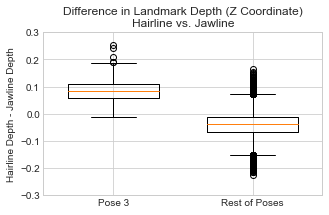

In [259]:
# ax = v1[pose_mask].std(axis=1).plot.box()
# ax.set_title(f"Standard Deviation of All Edge Landmarks, Pose {pose}")
# plt.ylim(0, 0.15)
# plt.show()
# ax = v1[~pose_mask].std(axis=1).plot.box()
# ax.set_title(f"Standard Deviation of All Edge Landmarks, Other Poses")
# plt.ylim(0, 0.15)
# plt.show()
# ax = v2[pose_mask].std(axis=1).plot.box()
# ax.set_title(f"Standard Deviation of top+bottom Edge Landmarks, Pose {pose}")
# plt.ylim(0, 0.15)
# plt.show()
# ax = v2[~pose_mask].std(axis=1).plot.box()
# ax.set_title(f"Standard Deviation of top+bottom Edge Landmarks, Other Poses")
# plt.ylim(0, 0.15)
# plt.show()

# Plot two boxplots side by side

X = [v3[pose_mask], v3[~pose_mask]]
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.boxplot(X, widths=0.65)
plt.xticks([1, 2], ['Pose 3', 'Rest of Poses'])
plt.ylabel("Hairline Depth - Jawline Depth")
plt.ylim(-0.3, 0.3)
plt.title(f"Difference in Landmark Depth (Z Coordinate)\nHairline vs. Jawline")
# Set theme
plt.style.use(style='seaborn-darkgrid')
plt.show()

# subplots with shared y axis
# fig, axs = plt.subplots(1,2, figsize=(10,5))
# fig.tight_layout()
# v3[pose_mask].plot.box(ax=axs[0], label="Pose 3")
# # axs[0].set_title(f"Diff of mean top+bottom Edge Landmarks, Pose {pose}")
# axs[0].set_ylim(-0.3, 0.3)
# v3[~pose_mask].plot.box(ax=axs[1], label="Other Poses")
# # axs[1].set_title(f"Diff of mean top+bottom Edge Landmarks, Other Poses")
# axs[1].set_ylim(-0.3, 0.3)
# fig.suptitle(f"Difference in Landmark Depth at Hairline vs. Jawline", y=1.05)
# plt.show()

# ax = v3[pose_mask].plot.box()
# ax.set_title(f"Diff of mean top+bottom Edge Landmarks, Pose {pose}")
# # plt.ylim(0, 0.15)
# plt.show()
# ax = v3[~pose_mask].plot.box()
# ax.set_title(f"Diff of mean top+bottom Edge Landmarks, Other Poses")
# # plt.ylim(0, 0.15)
# plt.show()

In [157]:
df_augmented['head_angle'] = v3

In [168]:
df_augmented.head()

,Filename,blendshapes,landmarks,Pose,Face Obstructed,Hands on Face,Notes,poor_quality,face_angled,Creator,Gender,Apparent_Race,head_angle
0,aug-Pose_2_Face-Yoga-Method_416.jpg,"[7.1687679792376e-07, 0.0015940895536914468, 0...","[(0.5354241728782654, 0.3942164480686188, -0.0...",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian,0.005279
1,zoom-Pose_2_Face-Yoga-Method_416.jpg,"[9.191711001221847e-07, 0.0002983348094858229,...","[(0.46912822127342224, 0.2676655948162079, -0....",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian,0.009748
2,shear-Pose_2_Face-Yoga-Method_416.jpg,"[4.570634928313666e-07, 0.0008711821283213794,...","[(0.4749401807785034, 0.40972456336021423, -0....",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian,0.003687
3,zoom-Pose_2_Face-Yoga-Method_417.jpg,"[1.2624046803466626e-06, 0.0002172658132622018...","[(0.4661442041397095, 0.2637966573238373, -0.0...",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian,0.009163
4,flip-Pose_2_Face-Yoga-Method_415.jpg,"[5.646483600685315e-07, 0.0006009486387483776,...","[(0.5249334573745728, 0.3435852825641632, -0.0...",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian,0.011169


## Pose 1/ Pose 9 Landmarks

In [198]:
pose_mask1 = df_augmented.Pose == 1
print(pose_mask1.value_counts())
pose_mask2 = df_augmented.Pose == 9
print(pose_mask2.value_counts())
pose_mask3 = (df_augmented.Pose != 1) & (df_augmented.Pose != 9)
print(pose_mask3.value_counts())

False    25464
True      2396
Name: Pose, dtype: int64
False    24637
True      3223
Name: Pose, dtype: int64
True     22241
False     5619
Name: Pose, dtype: int64


In [212]:
top_l_lid_df = get_subset_y_landmarks(landmarks, top_l_lid)
top_l_lid_mean = top_l_lid_df.mean(axis=1)
top_r_lid_df = get_subset_y_landmarks(landmarks, top_r_lid)
top_r_lid_mean = top_r_lid_df.mean(axis=1)
lid_mean = (top_l_lid_mean + top_r_lid_mean) / 2

l_brow_df = get_subset_y_landmarks(landmarks, l_brow)
l_brow_mean = l_brow_df.mean(axis=1)
r_brow_df = get_subset_y_landmarks(landmarks, r_brow)
r_brow_mean = r_brow_df.mean(axis=1)
brow_mean = (l_brow_mean + r_brow_mean) / 2

top_edge_df = get_subset_y_landmarks(landmarks, top_edge)
top_edge_mean = top_edge_df.mean(axis=1)

brow_height_dev = (l_brow_df.std(axis=1) + r_brow_df.std(axis=1))/2

face_line_mean = get_subset_y_landmarks(landmarks, [8, 162, 386]).mean(axis=1)

In [185]:
# get ratio of brow to top edge vs brow to top lid
df_ratio = (lid_mean - brow_mean) / (brow_mean - top_edge_mean)

In [199]:
df_brow_ratio = (brow_mean - top_edge_mean) / (lid_mean - top_edge_mean)

In [215]:
# get difference between brow and faceline
brow_mvmt = face_line_mean - brow_mean

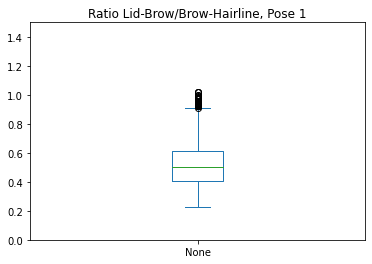

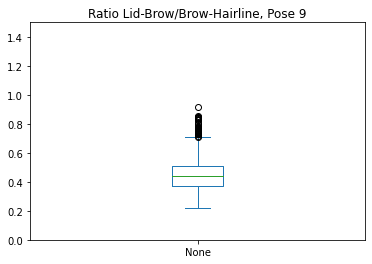

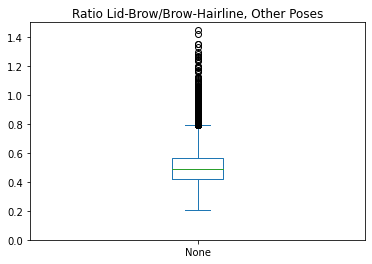

In [204]:
ax = df_ratio[pose_mask1].plot.box()
ax.set_title(f"Ratio Lid-Brow/Brow-Hairline, Pose 1")
plt.ylim(0, 1.5)
plt.show()
ax = df_ratio[pose_mask2].plot.box()
ax.set_title(f"Ratio Lid-Brow/Brow-Hairline, Pose 9")
plt.ylim(0, 1.5)
plt.show()
ax = df_ratio[pose_mask3].plot.box()
ax.set_title(f"Ratio Lid-Brow/Brow-Hairline, Other Poses")
plt.ylim(0, 1.5)
plt.show()

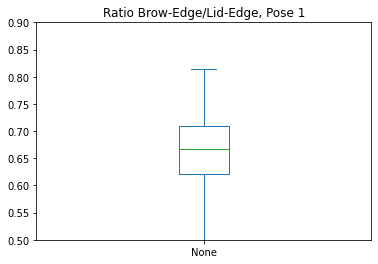

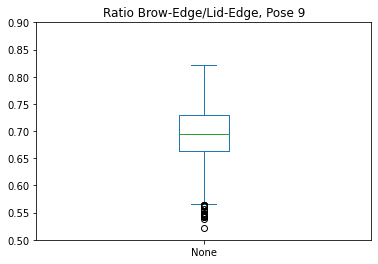

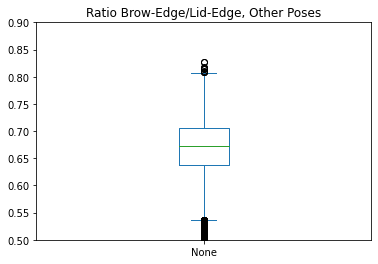

In [205]:
ax = df_brow_ratio[pose_mask1].plot.box()
ax.set_title(f"Ratio Brow-Edge/Lid-Edge, Pose 1")
plt.ylim(0.5, 0.9)
plt.show()
ax = df_brow_ratio[pose_mask2].plot.box()
ax.set_title(f"Ratio Brow-Edge/Lid-Edge, Pose 9")
plt.ylim(0.5, 0.9)
plt.show()
ax = df_brow_ratio[pose_mask3].plot.box()
ax.set_title(f"Ratio Brow-Edge/Lid-Edge, Other Poses")
plt.ylim(0.5, 0.9)
plt.show()

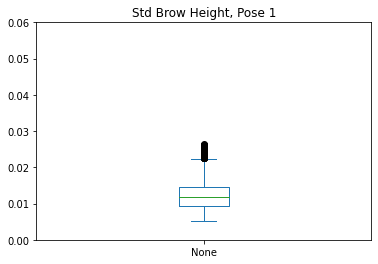

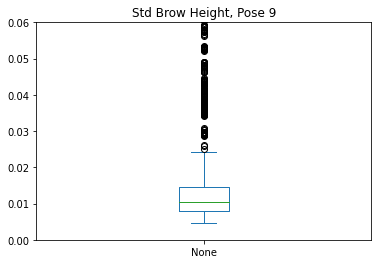

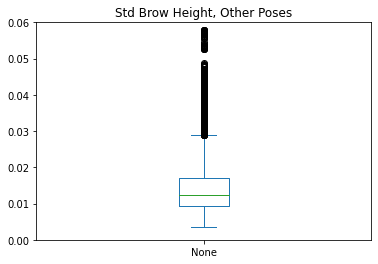

In [208]:
ax = brow_height_dev[pose_mask1].plot.box()
ax.set_title(f"Std Brow Height, Pose 1")
plt.ylim(0.00, 0.06)
plt.show()
ax = brow_height_dev[pose_mask2].plot.box()
ax.set_title(f"Std Brow Height, Pose 9")
plt.ylim(0.00, 0.06)
plt.show()
ax = brow_height_dev[pose_mask3].plot.box()
ax.set_title(f"Std Brow Height, Other Poses")
plt.ylim(0.00, 0.06)
plt.show()

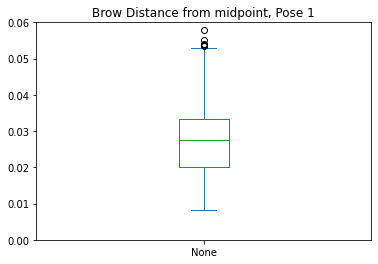

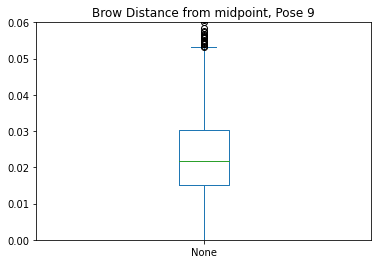

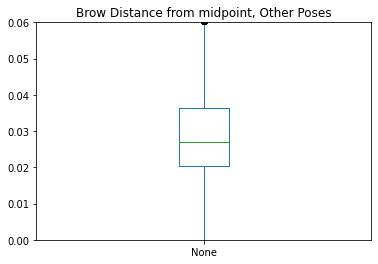

In [217]:
ax = brow_mvmt[pose_mask1].plot.box()
ax.set_title(f"Brow Distance from midpoint, Pose 1")
plt.ylim(0.00, 0.06)
plt.show()
ax = brow_mvmt[pose_mask2].plot.box()
ax.set_title(f"Brow Distance from midpoint, Pose 9")
plt.ylim(0.00, 0.06)
plt.show()
ax = brow_mvmt[pose_mask3].plot.box()
ax.set_title(f"Brow Distance from midpoint, Other Poses")
plt.ylim(0.00, 0.06)
plt.show()

In [209]:
df_augmented['brow_arch'] = brow_height_dev
df_augmented['brow_raise_ratio'] = df_brow_ratio
df_augmented['lid_brow_ratio'] = df_ratio

## Export test csv

In [210]:
df_augmented.head()

,Filename,blendshapes,landmarks,Pose,Face Obstructed,Hands on Face,Notes,poor_quality,face_angled,Creator,Gender,Apparent_Race,head_angle,brow_arch,brow_raise_ratio,lid_brow_ratio
0,aug-Pose_2_Face-Yoga-Method_416.jpg,"[7.1687679792376e-07, 0.0015940895536914468, 0...","[(0.5354241728782654, 0.3942164480686188, -0.0...",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian,0.005279,0.016992,0.624641,0.600919
1,zoom-Pose_2_Face-Yoga-Method_416.jpg,"[9.191711001221847e-07, 0.0002983348094858229,...","[(0.46912822127342224, 0.2676655948162079, -0....",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian,0.009748,0.016792,0.580730,0.721970
2,shear-Pose_2_Face-Yoga-Method_416.jpg,"[4.570634928313666e-07, 0.0008711821283213794,...","[(0.4749401807785034, 0.40972456336021423, -0....",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian,0.003687,0.010946,0.595802,0.678410
3,zoom-Pose_2_Face-Yoga-Method_417.jpg,"[1.2624046803466626e-06, 0.0002172658132622018...","[(0.4661442041397095, 0.2637966573238373, -0.0...",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian,0.009163,0.016876,0.583923,0.712553
4,flip-Pose_2_Face-Yoga-Method_415.jpg,"[5.646483600685315e-07, 0.0006009486387483776,...","[(0.5249334573745728, 0.3435852825641632, -0.0...",2,0,0,NaN,0,0,Face-Yoga-Method,F,Asian,0.011169,0.010762,0.598729,0.670204


In [211]:
df_augmented.to_csv('/Users/kelianneheinz/MIDS/courses/W210_Capstone/model_data/m1_landmark_summary_blendshape_results_face_angled_augmented.csv', index=False)